In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import plotly.express as px
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "/Users/daniel421/Desktop/STAT_724/ds_724/Final_Project"
# CHAPTER_ID = "dim_reduction"
# IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
# os.makedirs(IMAGES_PATH, exist_ok=True)

In [3]:
import os
#UP_DIR = '/Users/daniel421/Desktop/STAT_724/ISLR_data'
csv_file = os.path.join(PROJECT_ROOT_DIR,'listings_2.csv')
abnb = pd.read_csv(csv_file, low_memory=False)
print(abnb.head())

     id last_scraped                                               name  \
0  2595      11/3/21                              Skylit Midtown Castle   
1  3831      11/3/21  Whole flr w/private bdrm, bath & kitchen(pls r...   
2  5121      11/3/21                                    BlissArtsSpace!   
3  5136      11/3/21           Spacious Brooklyn Duplex, Patio + Garden   
4  5178      11/3/21                   Large Furnished Room Near B'way　   

   host_id host_since                      host_location  host_response_time  \
0     2845     9/9/08  New York, New York, United States  a few days or more   
1     4869    12/7/08  New York, New York, United States  a few days or more   
2     7356     2/3/09  New York, New York, United States  within a few hours   
3     7378     2/3/09  Brooklyn, New York, United States        within a day   
4     8967     3/3/09  New York, New York, United States  within a few hours   

  host_response_rate host_acceptance_rate host_is_superhost  ...  \


In [4]:
# abnb['host_is_superhost2'] = (abnb['host_is_superhost'] == 't').astype('int')

In [5]:
abnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37713 entries, 0 to 37712
Data columns (total 61 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            37713 non-null  int64  
 1   last_scraped                                  37713 non-null  object 
 2   name                                          37700 non-null  object 
 3   host_id                                       37713 non-null  int64  
 4   host_since                                    37682 non-null  object 
 5   host_location                                 37579 non-null  object 
 6   host_response_time                            20655 non-null  object 
 7   host_response_rate                            20655 non-null  object 
 8   host_acceptance_rate                          21359 non-null  object 
 9   host_is_superhost                             37682 non-null 

## EDA and Visualizations

In [6]:
import plotly.express as px

### Roomtypes in Qns

In [7]:
abnb_queens_df = abnb[abnb.neighbourhood_group_cleansed == 'Queens']

room_graph=px.histogram(abnb_queens_df, x="neighbourhood_cleansed",color = "room_type", title="Room types in Queens", template="plotly_white",
labels = {"count": "Count", "neighbourhood_cleansed": "Neighborhoods"})
room_graph.show()

In [8]:
px.histogram?

Signature:
px.histogram(
    data_frame=None,
    x=None,
    y=None,
    color=None,
    pattern_shape=None,
    facet_row=None,
    facet_col=None,
    facet_col_wrap=0,
    facet_row_spacing=None,
    facet_col_spacing=None,
    hover_name=None,
    hover_data=None,
    animation_frame=None,
    animation_group=None,
    category_orders=None,
    labels=None,
    color_discrete_sequence=None,
    color_discrete_map=None,
    pattern_shape_sequence=None,
    pattern_shape_map=None,
    marginal=None,
    opacity=None,
    orientation=None,
    barmode='relative',
    barnorm=None,
    histnorm=None,
    log_x=False,
    log_y=False,
    range_x=None,
    range_y=None,
    histfunc=None,
    cumulative=None,
    nbins=None,
    title=None,
    template=None,
    width=None,
    height=None,
)
Docstring:
    In a histogram, rows of `data_frame` are grouped together into a
    rectangular mark to visualize the 1D distribution of an aggregate
    function `histfunc` (e.g. the count or su

### Roomtypes in BK

In [9]:
abnb_brooklyn_df = abnb[abnb.neighbourhood_group_cleansed == 'Brooklyn']

room_graph=px.histogram(abnb_brooklyn_df, x="neighbourhood_cleansed",color = "room_type",title="Room types in Brooklyn", labels = {"count": "Count", "neighbourhood_cleansed": "Neighborhoods"}, template="plotly_white")
room_graph.show()

### Roomtypes in Manhattan

In [10]:
abnb_manhattan_df = abnb[abnb.neighbourhood_group_cleansed == 'Manhattan']

room_graph=px.histogram(abnb_manhattan_df, x="neighbourhood_cleansed", color = "room_type",title="Room types in Manhattan", labels = {"count": "Count", "neighbourhood_cleansed": "Neighborhoods"}, template="plotly_white")
room_graph.show()

In [11]:
# room_graph=px.histogram(abnb, x="neighbourhood_cleansed", facet_row = "room_type",title="Room types in NYC", template="plotly_white")
# room_graph.show()

In [12]:
abnb_east_elmhurst = abnb_queens_df[abnb_queens_df.neighbourhood_cleansed == "East Elmhurst"]
abnb_east_elmhurst_affordable = abnb_east_elmhurst[abnb_east_elmhurst.price < '70']
abnb_east_elmhurst_affordable.head()

,id,last_scraped,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
872,689329,11/3/21,Cozy 15 mins Manhattan& 10 Mins LGA,2446219,5/23/12,"New York, New York, United States",NaN,NaN,NaN,t,...,4.94,4.74,4.84,NaN,f,2,0,2,0,3.02
1224,973535,11/3/21,"Garden Apt, 5 mins from LaGuardia",3179866,8/6/12,"New York, New York, United States",within an hour,100%,98%,f,...,4.83,4.52,4.51,NaN,f,7,7,0,0,1.67
3019,3836199,11/3/21,"2 bedroom with yard, 4 mins to LGA",19758179,8/10/14,"New York, New York, United States",within an hour,80%,100%,f,...,4.65,4.31,4.46,NaN,f,1,1,0,0,1.48
3083,3930274,11/4/21,"1 BR🌿friendly close to LGA nd the 🌃, no extra ...",6689650,6/1/13,US,within a few hours,100%,50%,f,...,5.00,5.00,5.00,NaN,f,3,1,2,0,3.00
3579,4593770,11/3/21,Sunny & spacious 1 bedroom gem!,23812318,11/16/14,"Queens, New York, United States",NaN,NaN,NaN,f,...,5.00,4.77,4.91,NaN,f,1,1,0,0,0.51


In [13]:
# room_graph = px.histogram(abnb_east_elmhurst_affordable, x="room_type", title="Number of affordable room types",
#                        template="plotly_white")
# room_graph.show()

In [14]:
abnb_LIC = abnb_queens_df[abnb_queens_df.neighbourhood_cleansed == "Long Island City"]
abnb_LIC_affordable = abnb_LIC[abnb_LIC.price < '70']
abnb_LIC_affordable.head()

,id,last_scraped,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
23,12937,11/3/21,"1 Stop fr. Manhattan! Private Suite,Landmark B...",50124,10/31/09,"New York, New York, United States",within an hour,100%,94%,t,...,4.90,4.88,4.84,NaN,f,1,0,1,0,3.15
198,87566,11/3/21,1 BR apt near Midtown Manhattan,479521,4/2/11,"Holland, Pennsylvania, United States",within an hour,100%,38%,t,...,5.00,4.82,4.73,NaN,f,1,1,0,0,0.12
357,234870,11/3/21,Private Room With GREAT Location,1229984,9/30/11,"New York, New York, United States",within a day,70%,30%,f,...,4.94,4.90,4.74,NaN,f,2,0,2,0,0.64
431,269889,11/3/21,One stop from Midtown Manhattan!,1413098,11/16/11,"New York, New York, United States",within an hour,100%,100%,t,...,4.99,4.85,4.86,NaN,f,1,0,1,0,2.76
575,405025,11/3/21,LUXE Apt & Garden (Sanitized),2018042,3/27/12,"New York, New York, United States",within an hour,100%,100%,f,...,4.94,4.83,4.82,NaN,f,1,1,0,0,1.14


### Affordable room types

#### LIC

In [15]:
room_graph = px.histogram(abnb_LIC_affordable, x="room_type", title="Number of affordable room types",
                       template="plotly_white")
room_graph.show()

In [16]:
# room_graph = px.histogram(abnb_LIC, x="price", title="Affordable room prices",
#                        template="plotly_white", categoryorder = )

#### LIC part 2

In [17]:
room_graph = px.histogram(abnb_LIC, x="price", title="Affordable room prices",
                       template="plotly_white").update_xaxes(categoryorder = "total descending")
room_graph.show()

#### Manhattan

In [18]:
room_graph = px.histogram(abnb_manhattan_df, x="price", title="Affordable room prices",
                       template="plotly_white").update_xaxes(categoryorder = "total descending")
room_graph.show()

In [19]:
room_graph = px.histogram(abnb_manhattan_df, x="price", title="Affordable room prices",facet_col = "instant_bookable",
                       template="plotly_white").update_xaxes(categoryorder = "total descending")
room_graph.show()

#### Qns

In [20]:
room_graph = px.histogram(abnb_queens_df, x="price", title="Affordable room prices",
                       template="plotly_white").update_xaxes(categoryorder = "total descending")
room_graph.show()

### Instant Bookable

#### Qns

In [21]:
room_graph = px.histogram(abnb_queens_df, x="price", facet_col = "instant_bookable",title="Affordable room prices",
                        template="plotly_white").update_xaxes(categoryorder = "total descending")
room_graph.show()

In [22]:
room_graph = px.histogram(abnb_queens_df, x="price", facet_col = "instant_bookable",title="Affordable room prices",
                        template="plotly_white")
room_graph.show()

In [23]:
# fig = px.bar(abnb_queens_df, x="price", facet_row= "instant_bookable",title="Affordable room prices",
#                         template="plotly_white")
# fig.show()

In [24]:
room_graph = px.histogram(abnb_queens_df, x="price", facet_col = "instant_bookable",title="Affordable room prices: Queens",
                        template="plotly_white")
room_graph.show()

#### BK

In [25]:
room_graph = px.histogram(abnb_brooklyn_df, x="price", facet_col = "instant_bookable",title="Affordable room prices: Brooklyn",
                        template="plotly_white")
room_graph.show()

Manhattan

In [27]:
room_graph = px.histogram(abnb_manhattan_df, x="price", title="Affordable room prices: Manhattan",facet_col = "instant_bookable",
                       template="plotly_white")
room_graph.show()

### Visualizing Geographical Data

In [17]:
%store abnb_queens_df

Stored 'abnb_queens_df' (DataFrame)


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

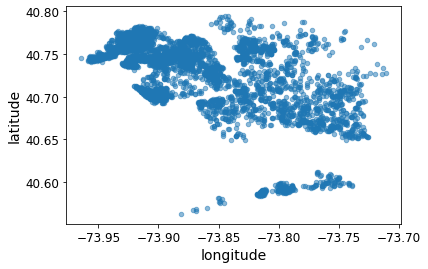

In [11]:
abnb_queens_df.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.51)

In [13]:
?plot

Object `plot` not found.


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ['$145.00 ' '$75.00 ' '$78.00 ' ... '$100.00 ' '$100.00 ' '$33.00 ']

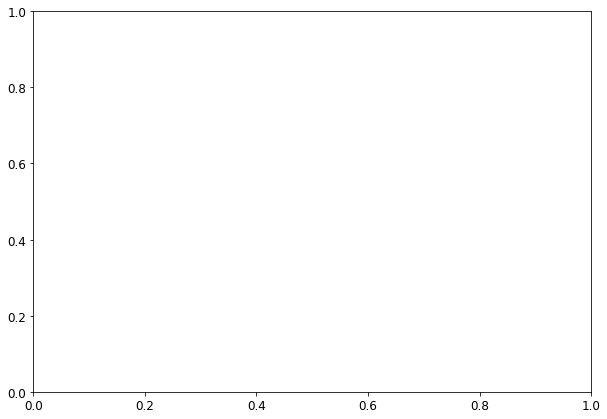

Signature:      abnb_queens_df.plot(*args, **kwargs)
Type:           PlotAccessor
String form:    <pandas.plotting._core.PlotAccessor object at 0x7fdfa01419d0>
File:           /opt/anaconda3/envs/sfds/lib/python3.9/site-packages/pandas/plotting/_core.py
Docstring:     
Make plots of Series or DataFrame.

Uses the backend specified by the
option ``plotting.backend``. By default, matplotlib is used.

Parameters
----------
data : Series or DataFrame
    The object for which the method is called.
x : label or position, default None
    Only used if data is a DataFrame.
y : label, position or list of label, positions, default None
    Allows plotting of one column versus another. Only used if data is a
    DataFrame.
kind : str
    The kind of plot to produce:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - '

In [16]:
# abnb_queens_df.plot?
abnb_queens_df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             label="instant_bookable", figsize=(10,7),
             c="price", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

## Run these cell(s) below after all visualizations are complete

In [28]:
# Run this cell after all visualizations are complete
abnb['host_is_superhost2'] = (abnb['host_is_superhost'] == 't').astype('int')
abnb['host_identity_verified2'] = (abnb['host_identity_verified'] == 't').astype('int')
abnb['has_availability2'] = (abnb['has_availability'] == 't').astype('int')
abnb['instant_bookable2'] = (abnb['instant_bookable'] == 't').astype('int')
abnb = pd.get_dummies(abnb, columns = ['room_type'], prefix = "dmy", prefix_sep = "_", drop_first = True)
#abnb['room_type2'] = (abnb['room_type'] == 'Entire home/apt').astype('int')

In [29]:
abnb['Borough'] = abnb['neighbourhood_group_cleansed']
abnb.drop(columns = ['id', 'host_id', 'name','host_since', 'host_location', 'host_response_time', 'host_is_superhost', 'host_has_profile_pic','host_neighbourhood','neighbourhood', 'neighbourhood_group_cleansed', 'property_type','bathrooms', 'bathrooms_text', 'calendar_last_scraped','last_scraped', 'first_review', 'last_review', 'license', 'host_identity_verified', 'has_availability', 'instant_bookable'], inplace= True)
abnb.dropna(axis=0, subset=['reviews_per_month'], inplace= True)
abnb.dropna(axis=0, subset=['host_response_rate'], inplace=True)

#### The response rates are objects, lets convert them to floats

In [30]:
abnb['host_response_rate'] = (abnb['host_response_rate'].str.strip('%').astype(float))
abnb['host_response_rate'] = abnb['host_response_rate']/100
abnb['host_acceptance_rate'] = (abnb['host_acceptance_rate'].str.strip('%').astype(float))
abnb['host_acceptance_rate'] = abnb['host_acceptance_rate']/100

#### The price are objects, lets convert them to integers

I am not able to convert them to regular integers

In [26]:
# abnb['price'] = (abnb['price'].str.strip('$').astype(int))
# abnb[abnb.columns[10]] = abnb[abnb.columns[10]].apply(lambda x: x.str.replace('$')).apply(lambda x: x.str.replace(',','')).astype(np.int64)
# abnb['price'] = abnb['price'].replace({'$':''}, regex = True)
# abnb['price'] = abnb['price'].astype(str)
# abnb['price'] = abnb['price'].replace('$', '')
# abnb['price'] = abnb['price'].astype(float)
# abnb['price'] = abnb['price'].astype(int)

# type(abnb['price'])
# abnb['price'] = abnb['price'].replace(['$'], [''], inplace = True)
# print(abnb.dtypes)
# abnb['price']
# abnb['prices'] = map(lambda x: x.replace("$",""), abnb['price'])
# abnb['prices'].astype(float)
# abnb['price'] = abnb['price'].astype(float)
# abnb['price'] = abnb['price'].astype(int)

0        None
1        None
2        None
3        None
4        None
         ... 
37708    None
37709    None
37710    None
37711    None
37712    None
Name: price, Length: 37713, dtype: object

In [1]:
abnb.fillna(axis = 0, method = "ffill")

NameError: name 'abnb' is not defined

In [52]:
# abnb['instant_bookable'].head()

0    f
1    f
2    f
3    f
4    f
Name: instant_bookable, dtype: object

In [32]:
abnb.to_csv('listings_6.csv', index = False)

In [33]:
abnb.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,accommodates,bedrooms,beds,...,calculated_host_listings_count_shared_rooms,reviews_per_month,host_is_superhost2,host_identity_verified2,has_availability2,instant_bookable2,dmy_Hotel room,dmy_Private room,dmy_Shared room,Borough
0,0.35,0.18,8.0,8.0,Midtown,40.75356,-73.98559,1,NaN,1.0,...,0,0.33,0,1,1,0,0,0,0,Manhattan
1,0.21,0.76,1.0,1.0,Bedford-Stuyvesant,40.68494,-73.95765,3,1.0,3.0,...,0,4.91,0,1,1,0,0,0,0,Brooklyn
2,1.00,1.00,1.0,1.0,Bedford-Stuyvesant,40.68535,-73.95512,2,1.0,1.0,...,0,0.53,0,1,1,0,0,1,0,Brooklyn
3,1.00,0.25,1.0,1.0,Sunset Park,40.66265,-73.99454,4,2.0,2.0,...,0,0.02,0,1,1,0,0,0,0,Brooklyn
4,1.00,1.00,1.0,1.0,Midtown,40.76457,-73.98317,2,1.0,1.0,...,0,3.70,0,0,1,0,0,1,0,Manhattan


In [1]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
import sklearn.linear_model as skl_lm
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE #Feature ranking with recursive feature elimination.
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf


import plotly.express as px

%matplotlib inline
plt.style.use('seaborn-white')

In [2]:
PROJECT_ROOT_DIR = "/Users/daniel421/Desktop/STAT_724/ds_724/Final_Project"
CHAPTER_ID = "classification_methods"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
# os.makedirs(IMAGES_PATH, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Importing the data

Getting the vizual dataframe if more plots are needed

In [3]:
import os
#UP_DIR = '/Users/daniel421/Desktop/STAT_724/ISLR_data'
csv_file = os.path.join(PROJECT_ROOT_DIR,'listings_6.csv')
abnb = pd.read_csv(csv_file, low_memory=False)
abnb = pd.DataFrame(data = abnb)
abnb_viz = abnb

Imputing the data with mean values. Creating the numerical dataframe

In [4]:
abnb.fillna(abnb.mean(), inplace=True)
abnb = pd.DataFrame(data = abnb)
abnb_df = abnb.drop(abnb.columns[[4,5,6,-1]], axis = 1)

Rescaling the variables

In [5]:
# rescaling the variables (both)
scaler = MinMaxScaler()
abnb_df_scaled = scaler.fit_transform(abnb_df)
# rename columns (since now its an np array)
abnb_df_scaled = pd.DataFrame(abnb_df_scaled)
abnb_df_scaled.columns = abnb_df.columns
# print(abnb_df_scaled.iloc[:5,:5])

## Perhaps we make the response variable, "instant_bookable2." 

In [6]:
abnb_X = abnb_df_scaled.drop(['instant_bookable2'], axis = 1)
abnb_y = abnb_df_scaled['instant_bookable2']

train, test, split data, with new response variable

In [7]:
X_train, X_test, y_train, y_test = train_test_split(abnb_X, abnb_y, test_size=0.3, random_state=10)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11193, 41)
(4798, 41)
(11193,)
(4798,)


# SVM

In [9]:
from sklearn.svm import SVC

In [10]:
# SVM Classifier model - cost for margin violation is C=10
svm_clf = SVC(kernel="linear", C=10.0)  #C=float("inf"))
svm_clf.fit(X_train, y_train)

# Repeat the fit with smaller "cost" C=0.1 (results in wider margins)
svm_clf2 = SVC(kernel="linear", C=1)  #C=float("inf"))
svm_clf2.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [11]:
yy = np.array(y_train)  # turn "y" into a numpy array to allow the subsetting below

Plot

In [12]:
print(X_train["accommodates"].min())
print(X_train["accommodates"].max())
print(X_train["bedrooms"].min())
print(X_train["bedrooms"].max())

0.0
1.0
0.0
1.0


In [13]:
# Plotting function
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)   

In [14]:
# print(X_train.iloc[:, 0][yy==0])
print(X_train.iloc[:, 5][yy==1])

15177    0.000000
3338     0.125000
11095    0.047935
7037     0.000000
14180    0.000000
           ...   
10742    0.000000
12328    0.047935
14826    0.000000
9372     0.000000
12815    0.375000
Name: bedrooms, Length: 3084, dtype: float64


In [15]:
#perhaps use PCA
#pick two of the most important features, perhaps from the regression methods
# select the "accomodates and reviews per month variable"

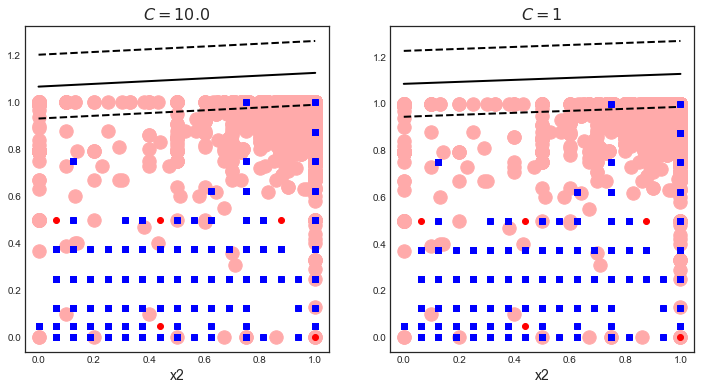

In [16]:
plt.figure(figsize=(12,6))

# Plot for C=10
plt.subplot(121)
plot_svc_decision_boundary(svm_clf, 0, 1)
plt.plot(X_train.iloc[:, 4][yy==1], X_train.iloc[:, 5][yy==1], "ro")
plt.plot(X_train.iloc[:, 4][yy==0], X_train.iloc[:, 5][yy==0], "bs")
plt.title("$C = {}$".format(svm_clf.C), fontsize=16)
plt.xlabel("x1", fontsize=14)
plt.xlabel("x2", fontsize=14)
# plt.axis([0, 1, 0, 1])

# Plot for C=1
plt.subplot(122)
plot_svc_decision_boundary(svm_clf2, 0, 1)
plt.plot(X_train.iloc[:, 4][yy==1], X_train.iloc[:, 5][yy==1], "ro") # "g^"
plt.plot(X_train.iloc[:, 4][yy==0], X_train.iloc[:, 5][yy==0], "bs")
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.xlabel("x1", fontsize=14)
plt.xlabel("x2", fontsize=14)
# plt.axis([-1.5, 2.8, -2.2, 2.8])

#save_fig("large_margin_classification_plot")
plt.show()

The following plot will take approximately 1 min and 33 seconds to run

Optimal number of features : 41


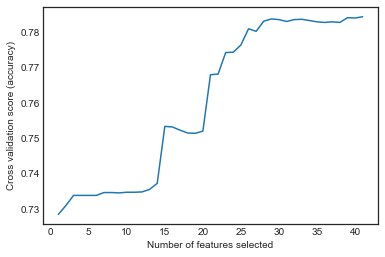

In [17]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
# X, y = make_classification(
#     n_samples=1000,
#     n_features=25,
#     n_informative=3,
#     n_redundant=2,
#     n_repeated=0,
#     n_classes=8,
#     n_clusters_per_class=1,
#     random_state=0,
# )

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=StratifiedKFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

## Nonlinear SVM classification methods

This took a minimum of 3minutes nd 35 seconds

In [18]:
# from sklearn.svm import LinearSVC
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# # X, y = make_moons(n_samples=100, noise=0.15)

# polynomial_svm_clf = Pipeline([
#         ("poly_features", PolynomialFeatures(degree=10)),
#         ("scaler", StandardScaler()),
#         ("svm_clf", LinearSVC(C=60, loss="hinge"))
#     ])

# polynomial_svm_clf.fit(X_train, y_train)

# K-means clustering

In [19]:
from sklearn.cluster import KMeans

Becuase the dataset is too large, this k-means algorithn is only used on the "accomodates" and "bedroom" fields

## K = 5

In [20]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_train.iloc[:, 4:6])

In [21]:
print(y_pred)

[1 0 0 ... 1 1 0]


In [22]:
print(kmeans.cluster_centers_)

[[0.11971173 0.00950862]
 [0.42201087 0.25836059]
 [0.28065604 0.13289393]
 [0.75826149 0.34874377]
 [0.26607884 0.00839361]]


In [23]:
# Perhaps stick to PCA

In [24]:
def plot_data(X):
    plt.plot(X_train.iloc[:, 4], X_train.iloc[:, 5], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='b'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=10, linewidths=11,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

Saving figure voronoi_plot


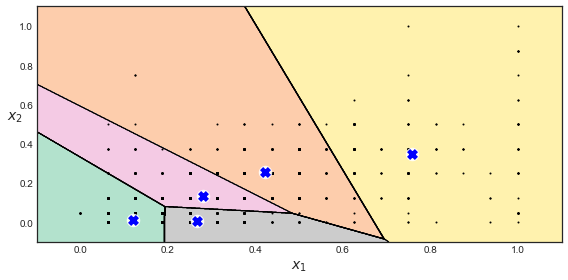

In [25]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X_train)
save_fig("voronoi_plot")
plt.show()

## K = 10

In [26]:
k2 = 10
kmeans2 = KMeans(n_clusters=k2, random_state=42)
y_pred = kmeans2.fit_predict(X_train.iloc[:, 4:6])

In [27]:
def plot_data(X):
    plt.plot(X_train.iloc[:, 4], X_train.iloc[:, 5], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='b'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=10, linewidths=11,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

Saving figure voronoi_plot


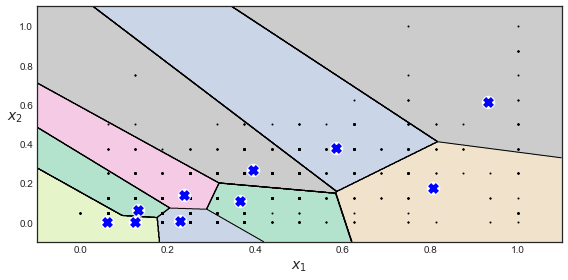

In [28]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans2, X_train)
save_fig("voronoi_plot")
plt.show()

# Discriminant Analysis CH4_Classification_Labs_2-1

In [29]:
import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression #perhaps this wont be needed
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import preprocessing
from sklearn import neighbors
from patsy import dmatrices
from IPython.display import Image
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

In [81]:
# Confusion matrix

def plot_cm(labels, predictions, p=0.5):
    
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('True Negatives: ', cm[0][0])
    print('False Positives: ', cm[0][1])
    print('False Negatives: ', cm[1][0])
    print('True Positives: ', cm[1][1])
    print('Total Positive (Actual): ', np.sum(cm[1]))

## LDA

In [86]:
lda = LinearDiscriminantAnalysis(solver="svd")
lda.fit(X_train, y_train)
# qda = QuadraticDiscriminantAnalysis()
# qda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [69]:
?lda.predict

Signature: lda.predict(X)
Docstring:
Predict class labels for samples in X.

Parameters
----------
X : array-like or sparse matrix, shape (n_samples, n_features)
    Samples.

Returns
-------
C : array, shape [n_samples]
    Predicted class label per sample.
File:      /opt/anaconda3/envs/sfds/lib/python3.9/site-packages/sklearn/linear_model/_base.py
Type:      method


In [87]:
pred = lda.predict(X_test)

LDA estimates $\pi_k$ using the proportion of the training observations that belong to the kth class. In other words, $\hat{\pi}_k = n_{k}/n$

In [88]:
print(lda.priors_)

[0.72447065 0.27552935]


In [36]:
# print(lda.means_)

In [89]:
print(lda.covariance_estimator)

None


In [90]:
# The line coefficients(intercept and slope). Not the coef of the decision boundary
print(lda.coef_)

[[-4.47473401e-01  3.76987258e+00  2.85179339e+00  2.85179339e+00
   1.43838795e+00 -2.26458816e+00 -8.11881072e-01  1.66532902e-02
  -9.30538515e+00  1.86706839e-01  2.20368306e+00  3.20237472e+01
   4.28862069e-01  2.81058363e+00 -2.81186359e+01 -5.34856026e-01
   1.07300836e+00 -8.16256200e-01  2.09544653e-01  1.22080624e-01
  -3.53645531e+00  5.78125614e+00  2.04117190e+00 -1.39754637e-01
  -3.04475557e-01  4.93800586e-01 -8.71171326e-01  1.02913527e-01
   4.31642065e-01 -3.07224505e-01 -2.15909330e+01  1.36933830e+01
   1.77142264e+01  2.70202849e+00  4.08472399e+00 -3.93178429e-01
  -1.41399489e-01  7.44182358e-01  2.17248095e+00  4.97948452e-01
  -3.45193818e-01]]


In [91]:
print(lda.intercept_)

[-4.42634114]


In [75]:
# Only available when eigen or svd solver is used.
# print(lda.explained_variance_ratio)

In [92]:
lda.predict_log_proba(X_train)

array([[-0.22704276, -1.59399138],
       [-0.406324  , -1.09689672],
       [-0.1024787 , -2.32890213],
       ...,
       [-0.24926704, -1.51127643],
       [-0.29098804, -1.37644152],
       [-0.22019391, -1.62132426]])

In [61]:
# lda.score(X_train, y_train[ ,1])

SyntaxError: invalid syntax (<ipython-input-61-6ef48af83396>, line 1)

In [93]:
lda.predict_proba(X_train)

array([[0.79688671, 0.20311329],
       [0.66609432, 0.33390568],
       [0.90259738, 0.09740262],
       ...,
       [0.77937182, 0.22062818],
       [0.74752462, 0.25247538],
       [0.8023632 , 0.1976368 ]])

In [94]:
# Find the accuracy of the predictions against the true classes
print("accuracy: %0.3f" % accuracy_score(y_test, pred))

# Show the confusion matrix
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=lda.classes_,columns=lda.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print('\nConfusion table:\n', cm_df)

# Additional statistics
print('\n',classification_report(y_test, pred))

accuracy: 0.774

Confusion table:
 True        0.0  1.0
Predicted           
0.0        3282  905
1.0         181  430

               precision    recall  f1-score   support

         0.0       0.78      0.95      0.86      3463
         1.0       0.70      0.32      0.44      1335

    accuracy                           0.77      4798
   macro avg       0.74      0.63      0.65      4798
weighted avg       0.76      0.77      0.74      4798



True Negatives:  3282
False Positives:  181
False Negatives:  905
True Positives:  430
Total Positive (Actual):  1335


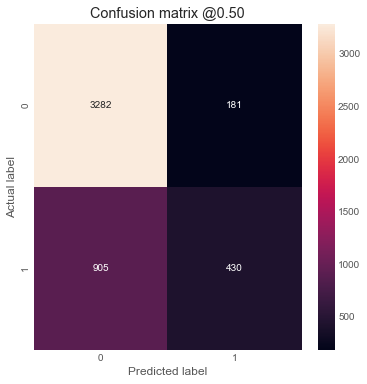

In [95]:
plot_cm(y_test, pred)

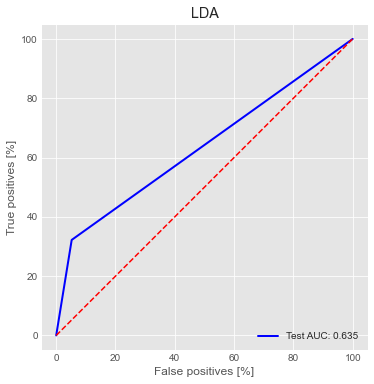

In [96]:
plt.figure(figsize = (6, 6))

plt.title('LDA')
#plot_roc("Train", train_labels, train_predictions_m1, color=colors[2])
plot_roc("Test", y_test, pred, color=colors[2]) #, linestyle='--')
plt.legend(loc='lower right')

In [67]:
# lda3 = LinearDiscriminantAnalysis(n_components=3, solver="svd")
# lda3.fit(X_train, y_train)
# pred_3 = lda3.predict(X_train)
# print(lda3.priors_)

ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

## QDA

In [97]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
pred_q = qda.predict(X_test)

#print(qda.means_)

# Find the accuracy of the predictions against the true classes
print("accuracy: %0.3f" % accuracy_score(y_test, pred_q))

# Show the confusion matrix
cm_df = pd.DataFrame(confusion_matrix(y_test, pred_q).T, index=lda.classes_,columns=lda.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print('\nConfusion table:\n', cm_df)

# Additional statistics
print('\n',classification_report(y_test, pred_q))

accuracy: 0.728

Confusion table:
 True        0.0   1.0
Predicted            
0.0        3363  1203
1.0         100   132

               precision    recall  f1-score   support

         0.0       0.74      0.97      0.84      3463
         1.0       0.57      0.10      0.17      1335

    accuracy                           0.73      4798
   macro avg       0.65      0.53      0.50      4798
weighted avg       0.69      0.73      0.65      4798



/opt/anaconda3/envs/sfds/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


True Negatives:  3363
False Positives:  100
False Negatives:  1203
True Positives:  132
Total Positive (Actual):  1335


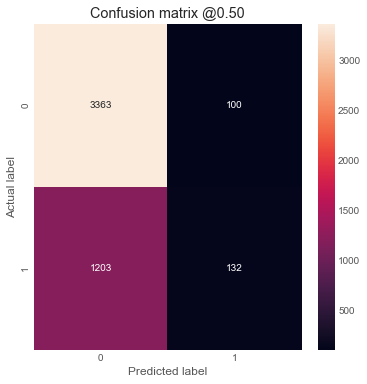

In [98]:
plot_cm(y_test, pred_q)

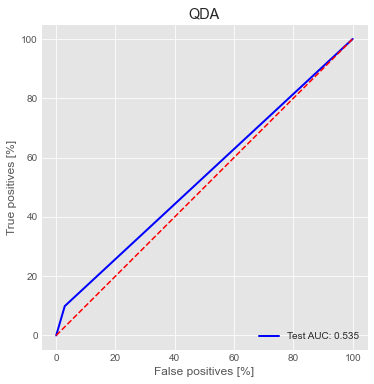

In [99]:
plt.figure(figsize = (6, 6))

plt.title('QDA')
#plot_roc("Train", train_labels, train_predictions_m1, color=colors[2])
plot_roc("Test", y_test, pred_q, color=colors[2]) #, linestyle='--')
plt.legend(loc='lower right')

# PCA

PCA using Scikit-Learn